In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt

In [2]:
data = pd.read_csv('TRAIN.csv')

In [3]:
data

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0       T1000001         1         S1            L3          R1  2018-01-01   
1       T1000002       253         S4            L2          R1  2018-01-01   
2       T1000003       252         S3            L2          R1  2018-01-01   
3       T1000004       251         S2            L3          R1  2018-01-01   
4       T1000005       250         S2            L3          R4  2018-01-01   
...          ...       ...        ...           ...         ...         ...   
188335  T1188336       149         S2            L3          R2  2019-05-31   
188336  T1188337       153         S4            L2          R1  2019-05-31   
188337  T1188338       154         S1            L3          R2  2019-05-31   
188338  T1188339       155         S3            L1          R2  2019-05-31   
188339  T1188340       152         S2            L1          R1  2019-05-31   

        Holiday Discount  #Order     Sales  
0             1      Yes       9   7011.84  
1             1      Yes      60  51789.12  
2             1      Yes      42  36868.20  
3             1      Yes      23  19715.16  
4             1      Yes      62  45614.52  
...         ...      ...     ...       ...  
188335        1      Yes      51  37272.00  
188336        1       No      90  54572.64  
188337        1       No      56  31624.56  
188338        1      Yes      70  49162.41  
188339        1       No      47  37977.00  

[188340 rows x 10 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [5]:
data.isnull().sum()

ID               0
Store_id         0
Store_Type       0
Location_Type    0
Region_Code      0
Date             0
Holiday          0
Discount         0
#Order           0
Sales            0
dtype: int64

In [6]:
# check for categories
data.nunique()

ID               188340
Store_id            365
Store_Type            4
Location_Type         5
Region_Code           4
Date                516
Holiday               2
Discount              2
#Order              299
Sales             47422
dtype: int64

In [7]:
data.describe()

Store_id        Holiday         #Order          Sales
count  188340.000000  188340.000000  188340.000000  188340.000000
mean      183.000000       0.131783      68.205692   42784.327982
std       105.366308       0.338256      30.467415   18456.708302
min         1.000000       0.000000       0.000000       0.000000
25%        92.000000       0.000000      48.000000   30426.000000
50%       183.000000       0.000000      63.000000   39678.000000
75%       274.000000       0.000000      82.000000   51909.000000
max       365.000000       1.000000     371.000000  247215.000000

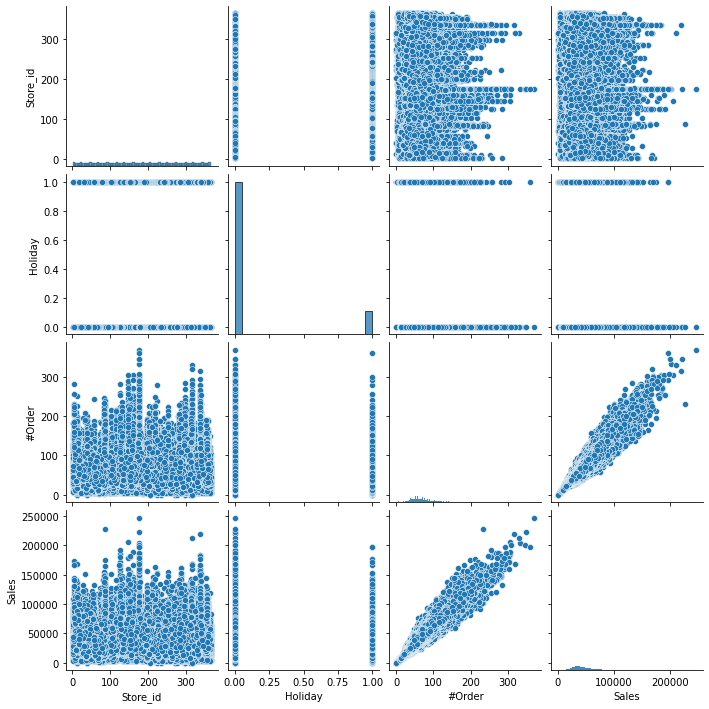

In [8]:
sns.pairplot(data)

Text(0.5, 1.0, 'correlation heatmap')

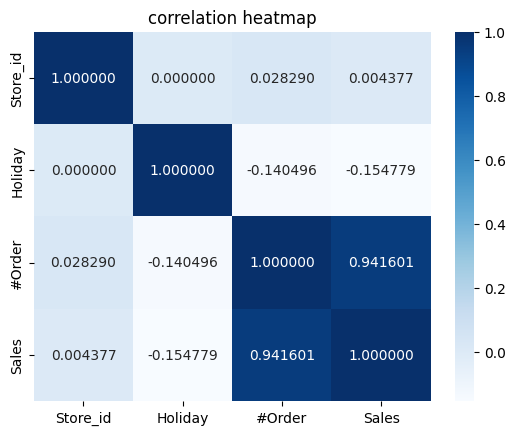

In [9]:
import matplotlib.pyplot as plt
plt.figure()
sns.heatmap(data.corr(), annot = True ,fmt = "3f" , cmap = "Blues")
plt.title("correlation heatmap")

In [10]:
import plotly.express as px

In [11]:
pie = data["Store_id"].value_counts()
store = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=store)
fig.show()

In [12]:
pie = data["Store_Type"].value_counts()
store = pie.index
orders = pie.values

fig = px.pie(data, values=orders, names=store)
fig.show()

In [13]:
pie2 = data["Location_Type"].value_counts()
Location = pie2.index
orders = pie2.values

fig = px.pie(data, values=orders, names=Location)
fig.show()

In [14]:
pie3 = data["Discount"].value_counts()
store = pie3.index
orders = pie3.values

fig = px.pie(data, values=orders, names=store)
fig.show()

In [15]:
data["Discount"] = data["Discount"].map({"No": 0, "Yes": 1})

In [16]:
data

ID  Store_id Store_Type Location_Type Region_Code        Date  \
0       T1000001         1         S1            L3          R1  2018-01-01   
1       T1000002       253         S4            L2          R1  2018-01-01   
2       T1000003       252         S3            L2          R1  2018-01-01   
3       T1000004       251         S2            L3          R1  2018-01-01   
4       T1000005       250         S2            L3          R4  2018-01-01   
...          ...       ...        ...           ...         ...         ...   
188335  T1188336       149         S2            L3          R2  2019-05-31   
188336  T1188337       153         S4            L2          R1  2019-05-31   
188337  T1188338       154         S1            L3          R2  2019-05-31   
188338  T1188339       155         S3            L1          R2  2019-05-31   
188339  T1188340       152         S2            L1          R1  2019-05-31   

        Holiday  Discount  #Order     Sales  
0             1         1       9   7011.84  
1             1         1      60  51789.12  
2             1         1      42  36868.20  
3             1         1      23  19715.16  
4             1         1      62  45614.52  
...         ...       ...     ...       ...  
188335        1         1      51  37272.00  
188336        1         0      90  54572.64  
188337        1         0      56  31624.56  
188338        1         1      70  49162.41  
188339        1         0      47  37977.00  

[188340 rows x 10 columns]

In [17]:
data["Store_Type"] = data["Store_Type"].map({"S1": 1, "S2": 2 , "S3": 3, "S4": 4})

In [18]:
data

ID  Store_id  Store_Type Location_Type Region_Code        Date  \
0       T1000001         1           1            L3          R1  2018-01-01   
1       T1000002       253           4            L2          R1  2018-01-01   
2       T1000003       252           3            L2          R1  2018-01-01   
3       T1000004       251           2            L3          R1  2018-01-01   
4       T1000005       250           2            L3          R4  2018-01-01   
...          ...       ...         ...           ...         ...         ...   
188335  T1188336       149           2            L3          R2  2019-05-31   
188336  T1188337       153           4            L2          R1  2019-05-31   
188337  T1188338       154           1            L3          R2  2019-05-31   
188338  T1188339       155           3            L1          R2  2019-05-31   
188339  T1188340       152           2            L1          R1  2019-05-31   

        Holiday  Discount  #Order     Sales  
0             1         1       9   7011.84  
1             1         1      60  51789.12  
2             1         1      42  36868.20  
3             1         1      23  19715.16  
4             1         1      62  45614.52  
...         ...       ...     ...       ...  
188335        1         1      51  37272.00  
188336        1         0      90  54572.64  
188337        1         0      56  31624.56  
188338        1         1      70  49162.41  
188339        1         0      47  37977.00  

[188340 rows x 10 columns]

In [19]:
data["Location_Type"] = data["Location_Type"].map({"L1": 1, "L2": 2 , "L3": 3, "L4": 4 , "L5": 5})

In [20]:
data

ID  Store_id  Store_Type  Location_Type Region_Code        Date  \
0       T1000001         1           1              3          R1  2018-01-01   
1       T1000002       253           4              2          R1  2018-01-01   
2       T1000003       252           3              2          R1  2018-01-01   
3       T1000004       251           2              3          R1  2018-01-01   
4       T1000005       250           2              3          R4  2018-01-01   
...          ...       ...         ...            ...         ...         ...   
188335  T1188336       149           2              3          R2  2019-05-31   
188336  T1188337       153           4              2          R1  2019-05-31   
188337  T1188338       154           1              3          R2  2019-05-31   
188338  T1188339       155           3              1          R2  2019-05-31   
188339  T1188340       152           2              1          R1  2019-05-31   

        Holiday  Discount  #Order     Sales  
0             1         1       9   7011.84  
1             1         1      60  51789.12  
2             1         1      42  36868.20  
3             1         1      23  19715.16  
4             1         1      62  45614.52  
...         ...       ...     ...       ...  
188335        1         1      51  37272.00  
188336        1         0      90  54572.64  
188337        1         0      56  31624.56  
188338        1         1      70  49162.41  
188339        1         0      47  37977.00  

[188340 rows x 10 columns]

In [21]:
#Store_id
data["Store_id"] = data["Store_id"].replace(0 , data["Store_id"].median())
#Store_Type
data["Store_Type"] = data["Store_Type"].replace(0 , data["Store_Type"].median())
#Location_Type
data["Location_Type"] = data["Location_Type"].replace(0 , data["Location_Type"].mean())
#Order
data["#Order"] = data["#Order"].replace(0 , data["#Order"].mean())
#Sales
data["Sales"] = data["Sales"].replace(0 , data["Sales"].mean())

In [22]:
data

ID  Store_id  Store_Type  Location_Type Region_Code        Date  \
0       T1000001         1           1              3          R1  2018-01-01   
1       T1000002       253           4              2          R1  2018-01-01   
2       T1000003       252           3              2          R1  2018-01-01   
3       T1000004       251           2              3          R1  2018-01-01   
4       T1000005       250           2              3          R4  2018-01-01   
...          ...       ...         ...            ...         ...         ...   
188335  T1188336       149           2              3          R2  2019-05-31   
188336  T1188337       153           4              2          R1  2019-05-31   
188337  T1188338       154           1              3          R2  2019-05-31   
188338  T1188339       155           3              1          R2  2019-05-31   
188339  T1188340       152           2              1          R1  2019-05-31   

        Holiday  Discount  #Order     Sales  
0             1         1     9.0   7011.84  
1             1         1    60.0  51789.12  
2             1         1    42.0  36868.20  
3             1         1    23.0  19715.16  
4             1         1    62.0  45614.52  
...         ...       ...     ...       ...  
188335        1         1    51.0  37272.00  
188336        1         0    90.0  54572.64  
188337        1         0    56.0  31624.56  
188338        1         1    70.0  49162.41  
188339        1         0    47.0  37977.00  

[188340 rows x 10 columns]

In [23]:
data.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', '#Order', 'Sales'],
      dtype='object')

In [24]:
X = data[[ 'Store_id', 'Store_Type', 'Location_Type',
       'Holiday', 'Discount', 'Sales']]
y = data['#Order']

In [25]:
X

Store_id  Store_Type  Location_Type  Holiday  Discount     Sales
0              1           1              3        1         1   7011.84
1            253           4              2        1         1  51789.12
2            252           3              2        1         1  36868.20
3            251           2              3        1         1  19715.16
4            250           2              3        1         1  45614.52
...          ...         ...            ...      ...       ...       ...
188335       149           2              3        1         1  37272.00
188336       153           4              2        1         0  54572.64
188337       154           1              3        1         0  31624.56
188338       155           3              1        1         1  49162.41
188339       152           2              1        1         0  37977.00

[188340 rows x 6 columns]

In [26]:
y

0          9.0
1         60.0
2         42.0
3         23.0
4         62.0
          ... 
188335    51.0
188336    90.0
188337    56.0
188338    70.0
188339    47.0
Name: #Order, Length: 188340, dtype: float64

In [27]:
#building the ml model
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.30, random_state=2529)

In [28]:
X_train

Store_id  Store_Type  Location_Type  Holiday  Discount     Sales
149696       194           1              1        0         1  42615.00
94631         23           1              1        0         0  31029.00
121453       364           2              3        0         1  59964.00
138401       169           1              2        1         1  31092.93
125631        29           1              4        0         1  49092.00
...          ...         ...            ...      ...       ...       ...
127716       299           1              1        0         1  59637.00
153999        47           4              2        0         0  39624.00
101180         6           4              1        0         0  20844.00
73266        168           2              3        0         0  34284.00
13664         15           4              2        0         1  59883.00

[131838 rows x 6 columns]

In [29]:
# verify shape
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((131838, 6), (56502, 6), (131838,), (56502,))

In [30]:
len(X_train)

131838

In [31]:
#pip install Lightgbm
import lightgbm as ltb
model = ltb.LGBMRegressor()

In [32]:
model.fit(X_train, y_train)

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003729 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 518
[LightGBM] [Info] Number of data points in the train set: 131838, number of used features: 6
[LightGBM] [Info] Start training from score 68.267628


LGBMRegressor()

In [33]:
y_pred = model.predict(X_test)

In [34]:
y_pred

array([51.73748682, 72.72413341, 79.73305493, ..., 45.59839541,
       30.0210999 , 60.47856214])

In [35]:
y_test

20174      53.0
41601      69.0
23061      80.0
133979     44.0
7429       96.0
          ...  
123619     45.0
44194     107.0
174333     49.0
24430      33.0
47118      56.0
Name: #Order, Length: 56502, dtype: float64

In [36]:
ps = pd.DataFrame(data={"predicted Orders": y_pred.flatten()})

In [37]:
ps

predicted Orders
0             51.737487
1             72.724133
2             79.733055
3             49.054311
4            102.444574
...                 ...
56497         42.009399
56498        116.761032
56499         45.598395
56500         30.021100
56501         60.478562

[56502 rows x 1 columns]

In [38]:
from sklearn.metrics import mean_squared_error

In [39]:
mse = mean_squared_error(y_test, y_pred)
rmse = mse**(0.5)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % rmse)

MSE: 40.27
RMSE: 6.35


In [40]:
import matplotlib.pyplot as plt

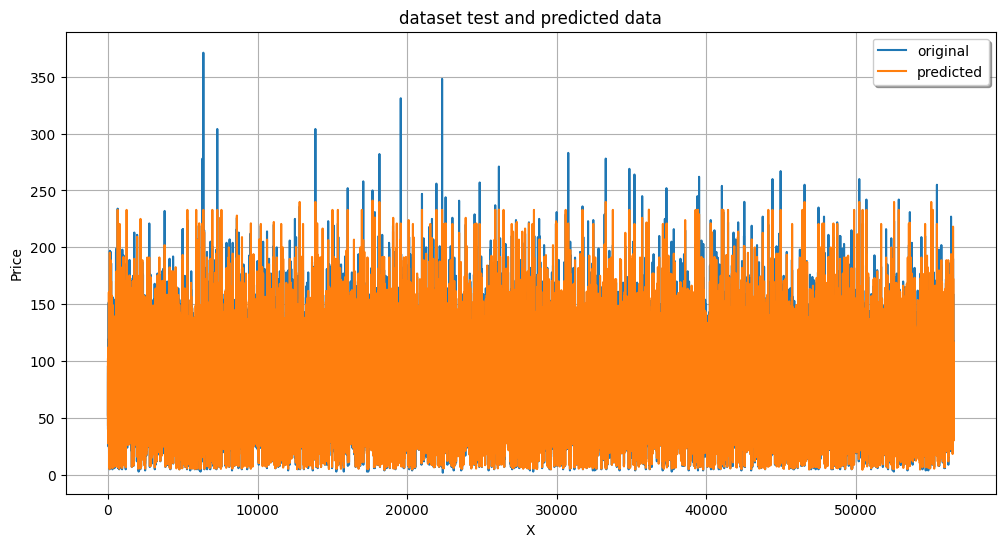

In [41]:
# visualizing in a plot
x_ax = range(len(y_test))
plt.figure(figsize=(12, 6))
plt.plot(x_ax, y_test, label="original")
plt.plot(x_ax, y_pred, label="predicted")
plt.title("dataset test and predicted data")
plt.xlabel('X')
plt.ylabel('Price')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

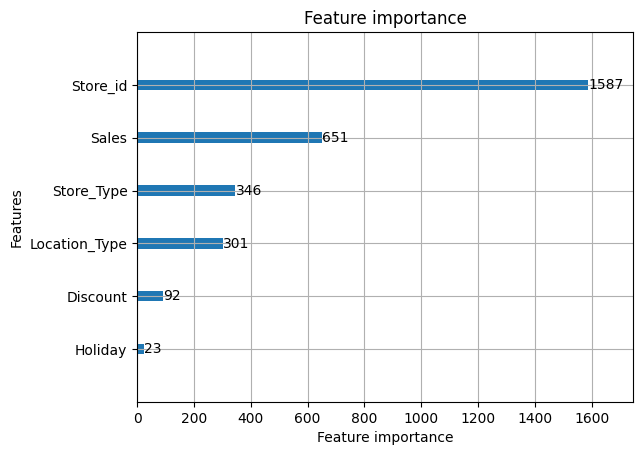

In [42]:
# plotting feature importance
ltb.plot_importance(model)

In [43]:
from sklearn import metrics

In [44]:
print(metrics.r2_score(y_test, y_pred))
print(metrics.mean_squared_log_error(y_test, y_pred))

0.9562858945612179
0.0070590486034566744


In [45]:
# model evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [46]:
# model MAE
mean_absolute_error(y_test,y_pred)

4.422288803822207

In [47]:
# model MAPE
mean_absolute_percentage_error(y_test, y_pred)

0.06651576952491974

In [48]:
# model MSE
mean_squared_error(y_test, y_pred)

40.26619220452121

In [49]:
# future prediction
sample = data.sample()
sample

ID  Store_id  Store_Type  Location_Type Region_Code        Date  \
130677  T1130678       116           2              3          R3  2018-12-25   

        Holiday  Discount  #Order    Sales  
130677        1         1     6.0  4964.49

In [50]:

# define X_new
X_new = sample.loc[:,X.columns]
X_new

Store_id  Store_Type  Location_Type  Holiday  Discount    Sales
130677       116           2              3        1         1  4964.49

In [51]:
# predict for X_new
model.predict(X_new)

array([6.81340205])